# Сборный проект №1 


## Описание проекта

Анализ выполняется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. По условиям задания принимаем, что планируется кампания на 2017-й год. 
В наборе данных есть аббревиатура ESRB (Entertainment Software Rating Board) — ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

План работы:

    Шаг 1 - Загрузка данных
    Шаг 2 - Предобработка данных
    Шаг 3 - Исследовательский анализ данных
    Шаг 4 - Составление портрета пользователя каждого региона
    Шаг 5 - Проверка гипотез
    Общий вывод

Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st
import pylab

import warnings 
warnings.filterwarnings('ignore')

## Загрузка данных

Выведем первые строки:

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим общую информацию по датафрейму:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Запишем в переменную data_base параметры начального датафрейма для последующей оценки количества данных после их подготовки:

In [5]:
data_base = data
data_base.shape[0]

16715

Наименование столбцов не соответствует стандарту snake_case. Некорректный тип данных в столбце User_score (качественный, а должен быть количественный).
Имеются пропуски данных.

Необходимо провести предобработку данных.

## Предобработка данных

### Переименуем столбцы в соответствии со snake_case

In [6]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков данных

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди числовых значений и NaN встречается аббревиатура 'tbd', что означает To Be Determined. Так указывается, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Предполагаем, что с таким явлением можно столкнуться при анализе малопопулярных игр, или игры, целевая аудитория которых не говорит на английском языке и не склонна оставлять отзывы на сайте, предпочитая локальные ресурсы для обмена опытом. Также это возможно для случаев, когда игра не локализована и запущена только на региональном языке, тогда пользователи вряд ли будут оставлять отзывы на глобальном сайте.

Примем, что 'tbd' является NaN, заменим значения в столбце.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Проверим пропуски в столбцах name и genre:

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах - строки 659 и 14244. Это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.
Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей игр.


Удалим данные строки:

In [12]:
data.dropna(subset=['genre','name'], inplace=True)

Проверим пропуски в столбцах year_of_release:

In [13]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные пропуски в значениях могли возникнуть по причине неполной передачи информации от создателей игр. Сумма пропущенных значений составляет менее 2% от выборки и может быть оставлена в том же виде, поскольку не окажет на нее критического влияния.

Пропуски в столбцах critic_score, user_score и rating.

In [14]:
data['critic_score'].isna().sum()

8576

In [15]:
data['user_score'].isna().sum()

9123

In [16]:
data['rating'].isna().sum()

6764

Для заполнения пропусков в этих столбцах используем индикаторное значение -1, т.к. пропусков очень много и их заполнение каким-либо значением может сместить оценки.

In [17]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [18]:
print('Количество пропусков в столбце critic_score - {}'.format(data['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(data['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


Заполнять пропуски в столбце rating средним или медианным значением было бы некорректно, поскольку на него влияют слишком много факторов, используем вместо этого индикатор 'without', чтобы не искажать данные.

In [19]:
data['rating'] = data['rating'].fillna('without')

Проверим вид датафрейма после заполнения пропусков.

In [20]:
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

### Преобразуем типы данных

Некорректный тип данных в столбце user_score (качественный, а должен быть количественный). Заменим на float64

In [21]:
try:
    data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')
except:
    print('user_score float64 type conversion fail')

Данные в столбце user_score представлены в формате object, преобразуем их в float64, поскольку это численный показатель.
Данные в столбце year_of_release представлены в формате float, можно заменить их на integer, поскольку переменная целое число.

### Работа с дубликатами 

In [22]:
data.duplicated().sum()

0

Явных дубликатов в датафрейме не выявлено.

Проверим наличие неявных дубликатов. Посмотрим уникальные значения в столбце name.

In [23]:
print('Количество уникальных значений name:', data['name'].unique().shape[0])
print(data['name'].unique())

Количество уникальных значений name: 11559
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


Удалим пробелы в начале и конце каждого названия.

In [24]:
data['name'] = data['name'].str.strip()

Приведем все названия к нижнему регистру.

In [25]:
data['name'] = data['name'].str.lower()

In [26]:
print('Количество уникальных значений name:', data['name'].unique().shape[0])

Количество уникальных значений name: 11559


Проверим наличие неполных дубликатов (по названию игры и году релиза):

In [27]:
part_data = data.loc[:, 'name':'year_of_release']
part_data.duplicated().sum()

1

In [28]:
part_data.drop_duplicates()
part_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
dtypes: float64(1), object(2)
memory usage: 522.3+ KB


### Отдельный столбец с суммой продаж по всем регионам 'total_sales':

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим какой объем данных сохранен для дальнейшей работы:

In [30]:
data_new = data
data_new.shape[0] / data_base.shape[0]

1.0

In [31]:
data_new.shape[0]

16713

Вывод:
Определены пропуски данных. 
Проведено удаление 2 строк (данные об одной и той же игре, только в разных сегментах рынка, отсутствует не только название, но и жанровая принадлежность, что в дальнейшем не поможет анализу)

Невозможно восстановить пропуски в столбцах:
critic_score и user_score, rating. В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка ее - субъективное мнение, зависящее от года, жанра, платформы, студии, издателя, рекламы и репутации, а также личных предпочтений. Пропуски заменены индикаторным значением.
 
Дубликатов не выявлено. Для дальнейшего анализа сохранены 99,98% данных.

## Аналитический анализ данных

### Количество игр, выпущенное в разные годы

Text(0, 0.5, 'Количество игр')

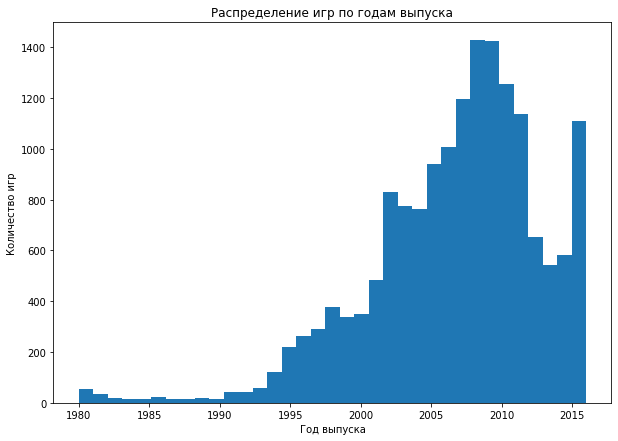

In [32]:
plt.figure(figsize=(10,7))
plt.hist(data['year_of_release'], bins = 35)
plt.title('Распределение игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Первые игры появились в 80-хх, но долгое время индустрия находилась на низком уровне производства. К середине 90-хх после появления удобных операционных систем с графическими оболочками и распространения Windows, увеличения количества ПК начинается рост количества выпускаемых игр. Пик приходится на период 2008-2009 года. После этого начался некоторый спад, связанный, вероятно, с развитием мобильных устройств, а также экономическим кризисом. 

### Продажи в зависимости от платформы

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [33]:
sales_by_platforms = data.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
sales_by_platforms.sort_values(('sum', 'total_sales'),ascending = False)

,sum
,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


Первые 6 платформ значительно превосходят по продажам остальных конкурентов. Рассмотрим, как менялись продажи по платформам 
- PS2	
- X360	
- PS3	
- Wii
- DS
- PS

In [34]:
top_platform_data = data.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')

<AxesSubplot:title={'center':'Графики продаж игр в зависимости от платформы'}, xlabel='Год', ylabel='Суммарные продажи в мире'>

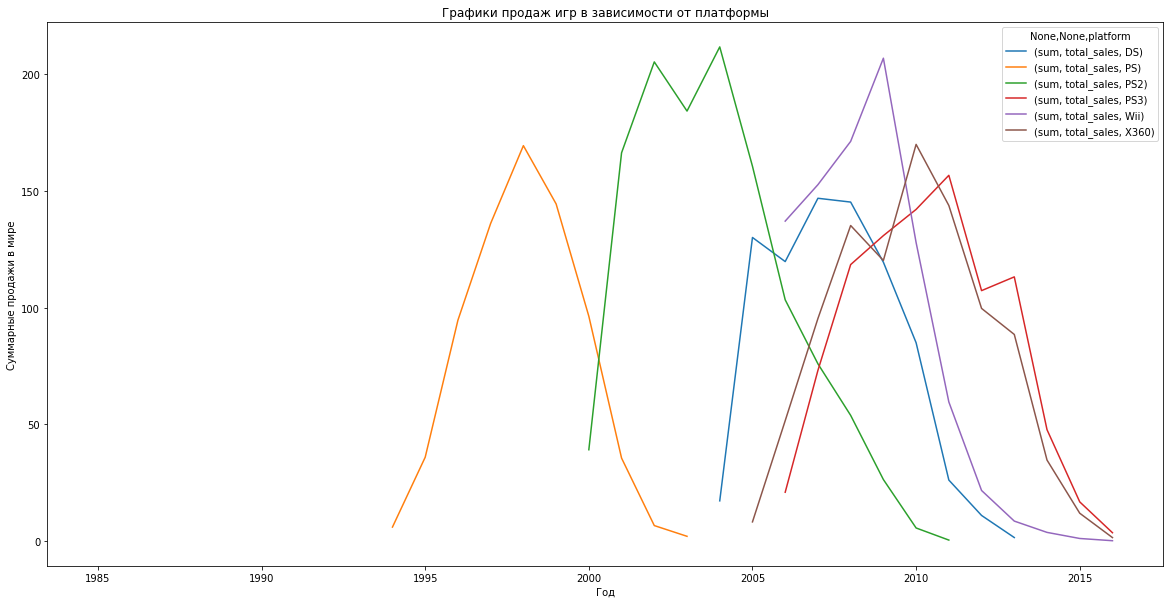

In [35]:
top_platforms_by_years = top_platform_data.pivot_table(
                                 index = ['year_of_release'], 
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'],)
                                
top_platforms_by_years.plot(figsize = (20,10), xlabel = 'Год', ylabel = 'Суммарные продажи в мире',
                            title = 'Графики продаж игр в зависимости от платформы')

Для платформ, которые пользуются популярностью, характерный срок "жизни" равен 8-12 лет. 
Для нашего прогноза на 2017 год следует отметить, что наиболее доходные платформы к 2015 году находятся на спаде. Нам будут нужны платформы, которые начинают расти, либо находятся на пике в 2016 году. Поэтому, учитывая время "жизни" платформы, стоит отобрать данные с 2010-2012 годов.

### Отбираем данные за актуальный период, с 2012 года. 

In [36]:
actual_data = data.query('year_of_release >= 2012')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,without,14.63
33,pokemon x/pokemon y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,without,14.60
34,call of duty: black ops ii,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,without,0.01
16707,aiyoku no eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,without,0.01
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,without,0.01
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,without,0.01


Оценим, какие платформы остались в актуальных данных:

In [37]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [38]:
sales_by_actual_platforms = actual_data.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
sales_by_actual_platforms.sort_values(('sum', 'total_sales'),ascending = False)

,sum
,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18


Отбираем из таблицы топ-5 платформ, которые будем оценивать далее (PS4, PS3, X360, 3DS, XOne)

<AxesSubplot:title={'center':'Графики продаж игр в зависимости от платформы'}, xlabel='Год', ylabel='Суммарные продажи в мире'>

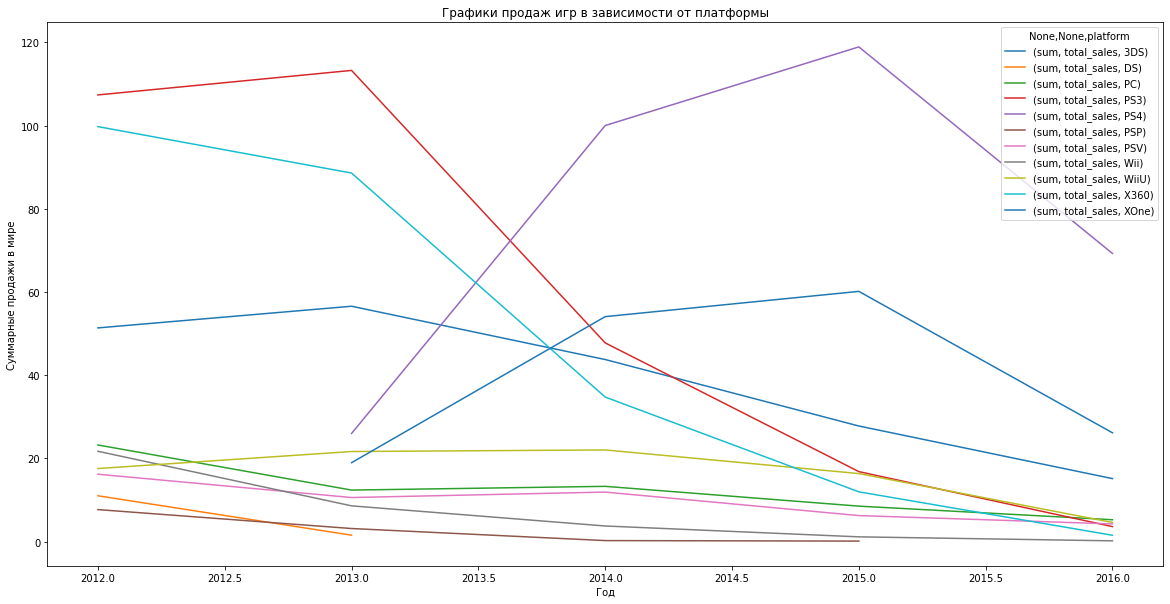

In [39]:
top_platforms_actual_data = actual_data.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_actual_data.reset_index()
top_platforms_actual_data.plot(figsize = (20,10), xlabel = 'Год', ylabel = 'Суммарные продажи в мире',
                            title = 'Графики продаж игр в зависимости от платформы')

Большинство платформ к 2016 году находятся на спаде. Наибольший потенциал наблюдается у PS4 и XOne, также можно рассмотреть 3DS.

Построим отдельные графики для топ-5 платформ (PS4, PS3, X360, 3DS, XOne)

Text(0, 0.5, 'Суммарные продажи')

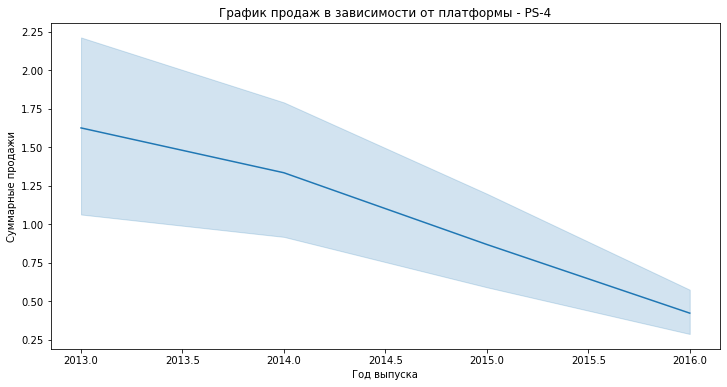

In [40]:
ps4_data_act = actual_data.query('platform == "PS4"')
plt.figure(figsize=(12,6))
sns.lineplot(data=ps4_data_act, x='year_of_release', y='total_sales')
plt.title('График продаж в зависимости от платформы - PS-4')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

Text(0, 0.5, 'Суммарные продажи')

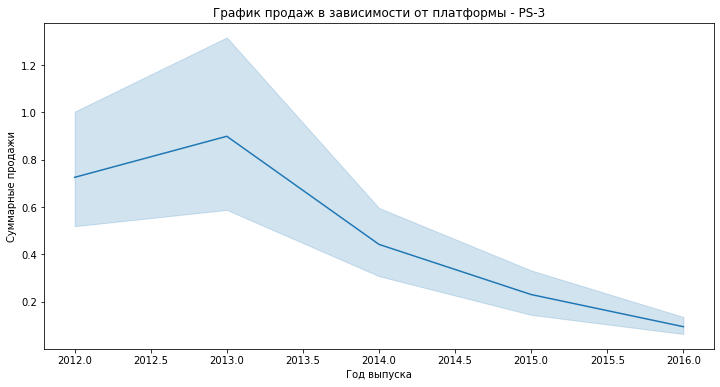

In [41]:
ps3_data_act = actual_data.query('platform == "PS3"')
plt.figure(figsize=(12,6))
sns.lineplot(data=ps3_data_act, x='year_of_release', y='total_sales')
plt.title('График продаж в зависимости от платформы - PS-3')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

Text(0, 0.5, 'Суммарные продажи')

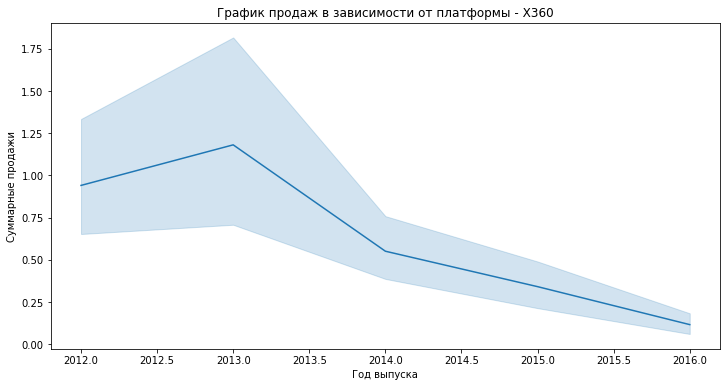

In [42]:
x360_data_act = actual_data.query('platform == "X360"')
plt.figure(figsize=(12,6))
sns.lineplot(data=x360_data_act, x='year_of_release', y='total_sales')
plt.title('График продаж в зависимости от платформы - X360')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

Text(0, 0.5, 'Суммарные продажи')

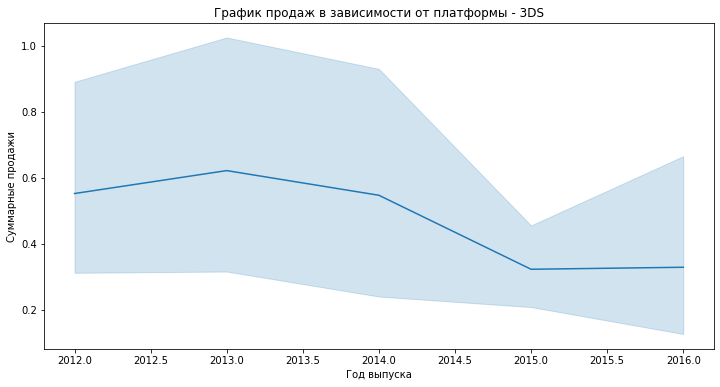

In [43]:
ds_3_data_act = actual_data.query('platform == "3DS"')
plt.figure(figsize=(12,6))
sns.lineplot(data=ds_3_data_act, x='year_of_release', y='total_sales')
plt.title('График продаж в зависимости от платформы - 3DS')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

Text(0, 0.5, 'Суммарные продажи')

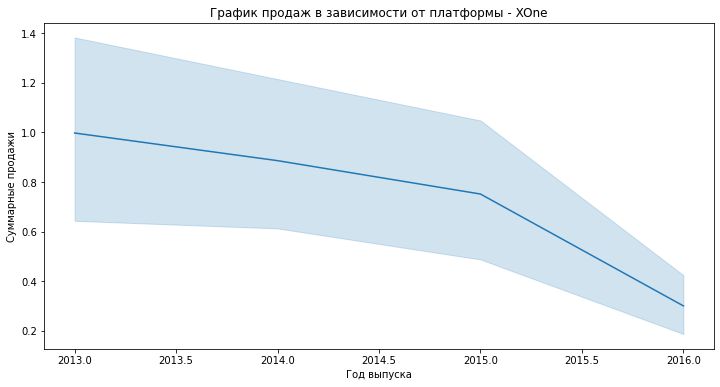

In [44]:
xone_data_act = actual_data.query('platform == "XOne"')
plt.figure(figsize=(12,6))
sns.lineplot(data=xone_data_act, x='year_of_release', y='total_sales')
plt.title('График продаж в зависимости от платформы - XOne')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

Построим график «ящик с усами» по глобальным продажам игр и в разбивке по платформам. 

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

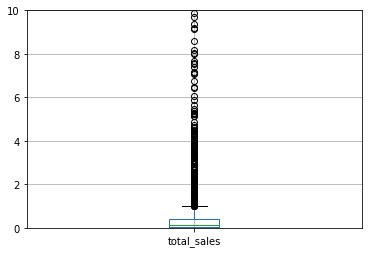

In [45]:
actual_data.boxplot(column = 'total_sales')
plt.ylim(0, 10)
actual_data['total_sales'].describe()

Как мы видим на диаграмме размаха, наибольшая доля продаж находится в достаточно узком диапазоне с медианным значением 0,5 млн долларов, средним 1,24 млн долларов. Максимум - 21,05 млн долларов, что является аномальным значением.

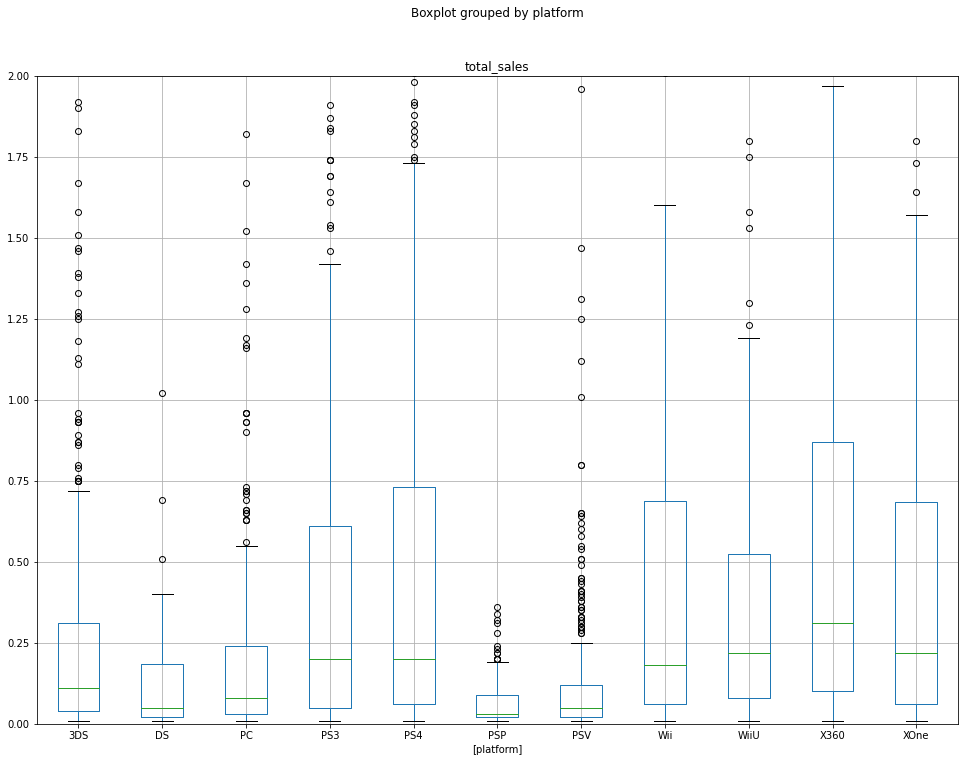

In [46]:
actual_data.boxplot(column = ['total_sales'],by = ['platform'], figsize=(16, 12))
plt.ylim([0, 2])
plt.show()

По всем платформам медианы продаж находятся на уровне до 0,3 млн долларов. Наиболее высокие значения Q3 наблюдаются у платформ PS3, PS4, X360, XOne, Wii.

### Влияние на продажи отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [47]:
ps_4_actual_data = actual_data.query('platform =="PS4" and critic_score > 0 and user_score > 0')
ps_4_sales_crit_and_user_ratings = ps_4_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']] 
ps_4_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
42,12.62,97.0,8.3
77,8.58,82.0,4.3
92,7.66,83.0,5.7
94,7.60,85.0,5.0
105,7.17,87.0,6.5


Соотнесите выводы с продажами игр на других платформах.

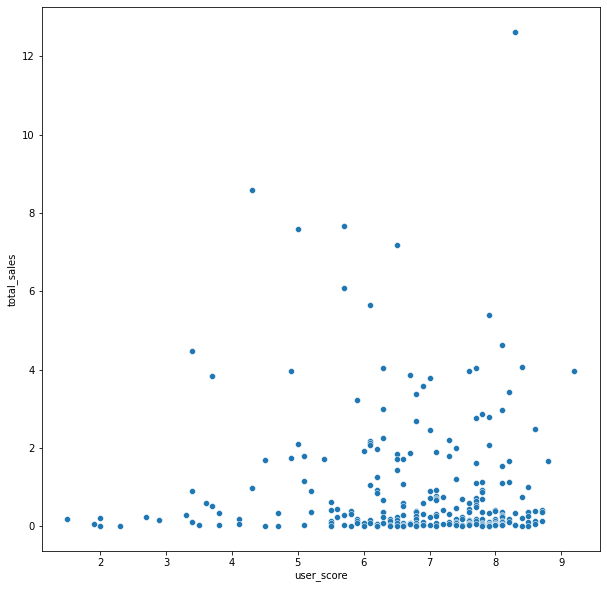

In [48]:
ps_4_user_score = sns.scatterplot(data = ps_4_actual_data, x = 'user_score',y = 'total_sales')
ps_4_user_score.figure.set_figwidth(10)
ps_4_user_score.figure.set_figheight(10)

In [49]:
ps_4_actual_data['user_score'].corr(ps_4_actual_data['total_sales'])

-0.03362497447207173

Коэффициент корреляции близок к нулю, следовательно оценки пользователей не влияют на продажи.

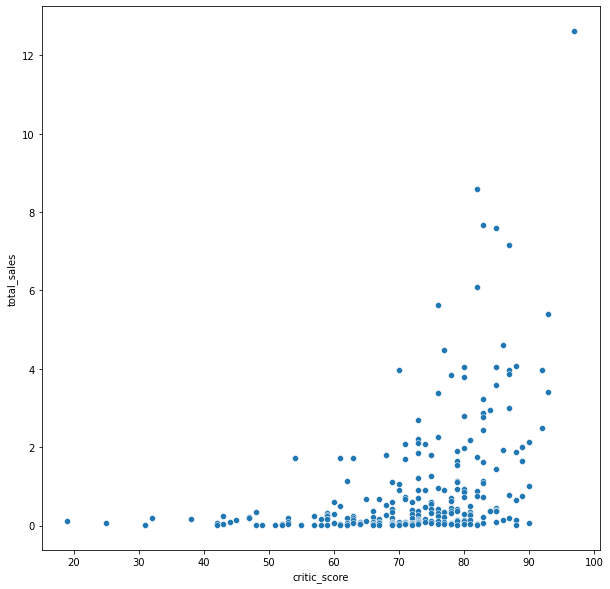

In [50]:
ps_4_user_score = sns.scatterplot(data = ps_4_actual_data, x = 'critic_score',y = 'total_sales')
ps_4_user_score.figure.set_figwidth(10)
ps_4_user_score.figure.set_figheight(10)

In [51]:
ps_4_actual_data['critic_score'].corr(ps_4_actual_data['total_sales'])

0.40589480145836687

Коэффициент корреляции близок к нулю, хотя и больше, чем в случае с оценкой пользователей. Значение слишком мало, чтобы говорить о наличии прямой связи, следовательно оценки критиков не влияют на продажи.

Возьмем для проверки другую платформу - X360 - и повторим расчеты.

In [52]:
x_360_actual_data = actual_data.query('platform =="X360" and critic_score > 0 and user_score > 0')
x_360_actual_data['user_score'].corr(x_360_actual_data['total_sales'])

-0.0020140269517310468

In [53]:
x_360_actual_data['critic_score'].corr(x_360_actual_data['total_sales'])

0.3605734888507336

Коэффициент корреляции близок к нулю в обоих случаях. Значение слишком мало, чтобы говорить о наличии прямой связи, оценки критиков и пользователей не влияют на продажи.

Построим тепловую карту корреляции:

<AxesSubplot:>

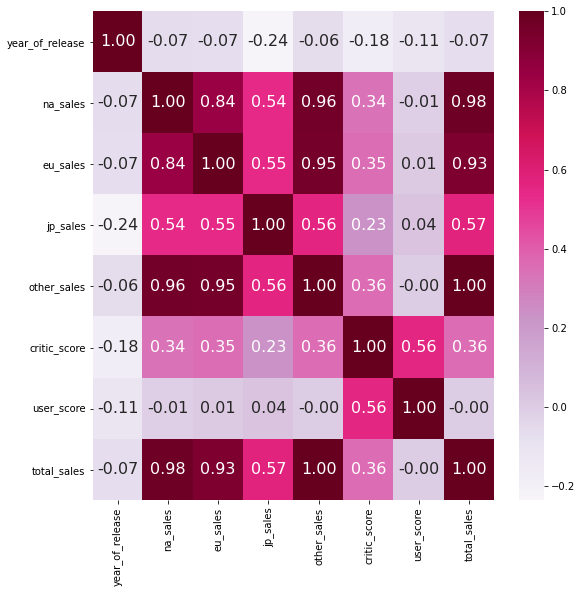

In [54]:
plt.figure(figsize=(9,9))
sns.heatmap(x_360_actual_data.corr(), annot=True, cmap="PuRd", fmt='.2f', annot_kws={'size':16})

Что любопытно, имеется прямая взаимосвязь между оценками критиков и пользователей. Тем не менее, говорить о значительном влиянии на продажи оценок не приходится - оба коэффициента корреляции ниже 0,4.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [55]:
popular_genre = actual_data.groupby('genre').agg({'name':'count', 'total_sales':'sum'}).reset_index()
popular_genre.sort_values(by='name', ascending=False)

,genre,name,total_sales
0,Action,1031,441.12
7,Role-Playing,370,192.80
1,Adventure,302,29.43
10,Sports,268,181.07
8,Shooter,235,304.73
3,Misc,192,85.04
6,Racing,115,53.50
2,Fighting,109,44.49
4,Platform,85,61.00
9,Simulation,80,35.12


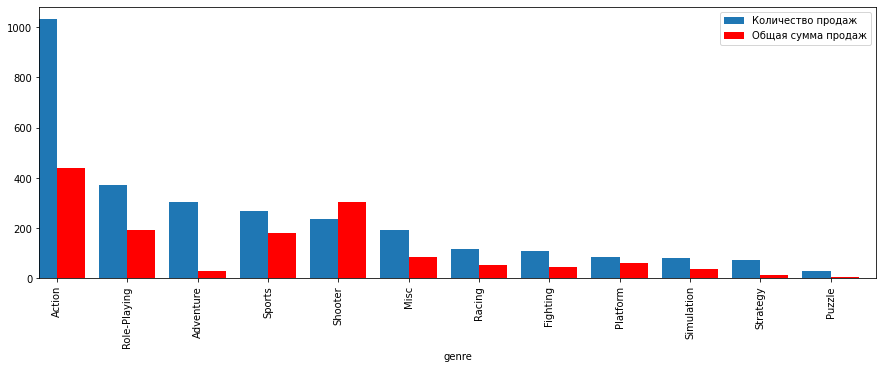

In [56]:
ax = plt.gca()

pivot = actual_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ax=ax, width=0.4, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.4, color='red', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Рассмотрим медианные продажи по каждому жанру:

In [57]:
popular_genre_mean = actual_data.groupby('genre').agg({'name':'count', 'total_sales':'mean'}).reset_index()
popular_genre_mean.sort_values(by='name', ascending=False)

,genre,name,total_sales
0,Action,1031,0.427856
7,Role-Playing,370,0.521081
1,Adventure,302,0.097450
10,Sports,268,0.675634
8,Shooter,235,1.296723
3,Misc,192,0.442917
6,Racing,115,0.465217
2,Fighting,109,0.408165
4,Platform,85,0.717647
9,Simulation,80,0.439000


Text(0, 0.5, 'Продажи')

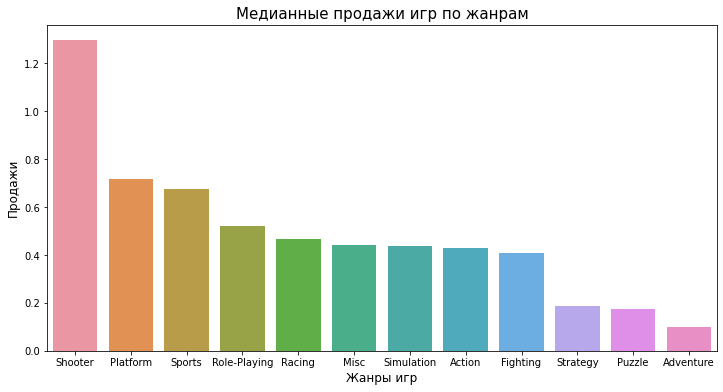

In [58]:
plt.figure(figsize=(12,6))
plt.title('Медианные продажи игр по жанрам', fontsize=15)
sns.barplot(data=popular_genre_mean.sort_values(by='total_sales', ascending=False), x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Вывод: Самыми прибыльными жанрами по суммарному доходу можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing). На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).
Однако стоит заметить, что такие значения могли быть получены из-за отдельных успешных "выбросов". Медианные значения же говорят нам о том, что наиболее успешно вкладываться в создание игр в жанре Shooter и Platform (практически наравне со Sport). Вероятно, дело еще обусловлено стоимостью разработки - для более сложных структур Action и Role-Playing она бывает выше, чем для шутеров. Самое низкое значение медианных продаж показали игры в жанре Adventure.

##  Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

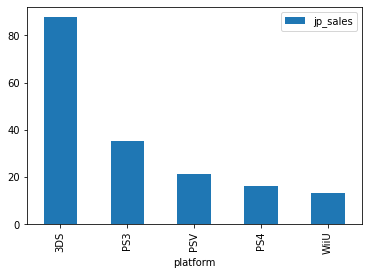

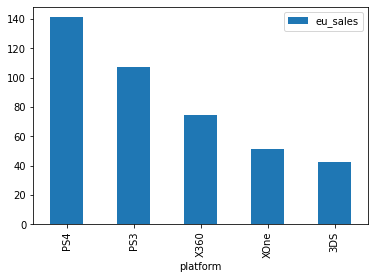

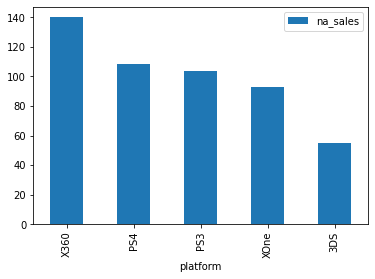

In [59]:
actual_data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')
actual_data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
actual_data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
plt.show()

У пользователей Северной Америки и Европы предпочтение схожие - в топ-5 платформ попали X360, PS3, PS4б XOne, а завершает пятерку 3DS. В Японии самыми популярными, со значительным отрывом, оказались платформы 3DS.

### Самые популярные жанры (топ-5)

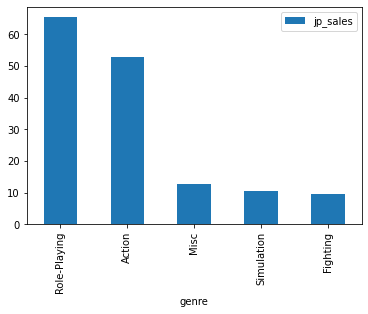

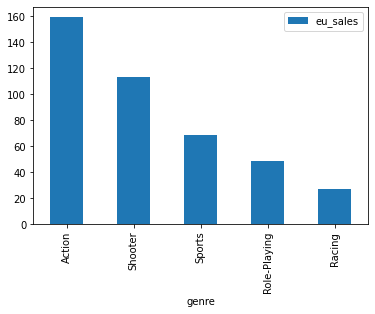

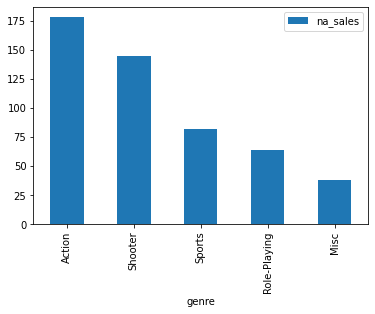

In [60]:
actual_data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')
actual_data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
actual_data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
plt.show()

Предпочтение пользователей Северной Америки и Европы совпадают в первых 4 пунктах топ-листа - Action, Shooter, Sports, Role-Playing. На последнем месте топа Америки - Misc, Европы - Racing. В Японии так же любят Role-Playing и Action являются наиболее любимыми жанрами, а замыкают топ жанры Misc, Simulation и Fighting.

### Влияние рейтинга на продажи 

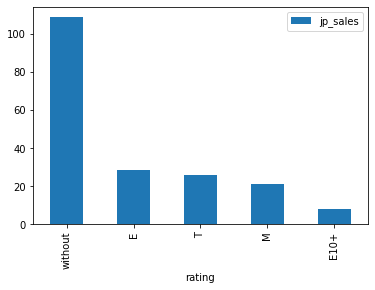

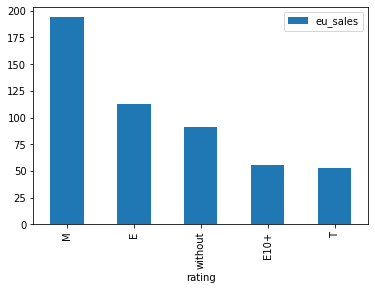

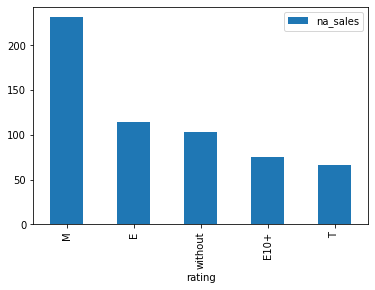

In [61]:
actual_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
actual_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
actual_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

В Северной Америке и Европе ситуация практически идентична. Первую пятерку составляют игры рейтинга М("Для взрослых"), E("Для всех"), игры без рейтинга, E10+("От 10 лет и старше"), T("Подросткам"). 
В Японии же с отрывом лидируют игры без рейтинга.
Возможно, причина подобного распределения в том, что организация Entertainment Software Rating Board (ESRB) — негосударственная организация, направление деятельности которой - принятие и определение рейтингов для компьютерных видеоигр в США и Канаде.
Вероятно, в Японии свой рынок игр и применяется своя система рейтингов, либо игры зачастую не оцениваются ESRB.

## Проверка гипотез

### Гипотеза №1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и анльтернативную гипотезы:

    Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
    H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Выборки независимы между собой, поэтому будем использовать t-критерий Стьюдента.

In [62]:
alpha = 0.05
xbox_one = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']
results_1 = st.ttest_ind(xbox_one, pc)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535102819461235
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Гипотеза №2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы:

    H0: Средние пользовательские рейтинги жанров Action и Sports равны
    H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Выборки независимы между собой, поэтому будем использовать t-критерий Стьюдента.

In [63]:
alpha = 0.05
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sport = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']
results_2 = st.ttest_ind(action, sport)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.716101071226201e-26
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports различаются

## Общий вывод

Проведено исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны.
Входные данные: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) 
Цель исследования: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Предообработка данных
Входные данные были оценены с точки зрения их полноты и достаточности для анализа. Выявлено наличие пропусков в данных по столбцам. Причиной может являться человеческий фактор и технические ошибки при заполнении данных.
Исправлены типы данных в датафрейме.
Проведена проверка наличия пропущенных данных.
Выявлены дубликаты, проведено их удаление.
Добавлен столбец с суммой продаж по всем регионам.

### Анализ данных

Первые игры появились в 80-хх, но долгое время индустрия находилась на низком уровне производства. К середине 90-хх после появления удобных операционных систем с графическими оболочками и распространения Windows, увеличения количества ПК начинается рост количества выпускаемых игр. Пик приходится на период 2008-2009 года. После этого начался некоторый спад, связанный, вероятно, с развитием мобильных устройств, а также экономическим кризисом.

Для платформ, которые пользуются популярностью, рассмотрены графики продаж по годам, определен характерный срок "жизни", он равен 8-12 годам. Для нашего прогноза на 2017 год следует отметить, что наиболее доходные платформы к 2015 году находятся на спаде. Нам будут нужны платформы, которые начинают расти, либо находятся на пике в 2016 году. Поэтому, учитывая время "жизни" платформы, отобраны данные с 2012 года.

По всем платформам медианы продаж находятся на уровне до 0,3 млн долларов. Наиболее высокие значения Q3 наблюдаются у платформ PS3, PS4, X360, XOne, Wii.
На диаграмме размаха видно, что наибольшая доля продаж находится в достаточно узком диапазоне с медианным значением 0,5 млн долларов, средним 1,24 млн долларов. Максимум - 21,05 млн долларов, что является аномальным значением.

Для оценки наличия зависимости продаж от оценки пользователей и критиков построены диаграммы рассеяния, коэффициент корреляции близок к нулю в обоих случаях. Значение слишком мало, чтобы говорить о наличии прямой связи, оценки критиков и пользователей не влияют на продажи.

Составлен портрет пользователя каждого региона (Северная Америка, Европа, Япония):
- Самые популярные платформы (топ-5): У пользователей Северной Америки и Европы предпочтение схожие - в топ-5 платформ попали X360, PS3, PS4б XOne, а завершает пятерку 3DS. В Японии самыми популярными, со значительным отрывом, оказались платформы 3DS.
- Самые популярные жанры(топ-5): Предпочтение пользователей Северной Америки и Европы совпадают в первых 4 пунктах топ-листа - Action, Shooter, Sports, Role-Playing. На последнем месте топа Америки - Misc, Европы - Racing. В Японии так же любят Role-Playing и Action являются наиболее любимыми жанрами, а замыкают топ жанры Misc, Simulation и Fighting.
- Влияние рейтинга на продажи: В Северной Америке и Европе ситуация практически идентична. Первую пятерку составляют игры рейтинга М("Для взрослых"), E("Для всех"), игры без рейтинга, E10+("От 10 лет и старше"), T("Подросткам"). В Японии же с отрывом лидируют игры без рейтинга. Возможно, причина подобного распределения в том, что организация Entertainment Software Rating Board (ESRB) — негосударственная организация, направление деятельности которой - принятие и определение рейтингов для компьютерных видеоигр в США и Канаде. Вероятно, в Японии свой рынок игр и применяется своя система рейтингов, либо игры зачастую не оцениваются ESRB. 


### Выводы
После проверок гипотез получили следующие результаты:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
     - Нулевая гипотеза не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
     - Нулевая гипотеза отвергнута. Средние пользовательские рейтинги жанров Action и Sports различаются. 
     
 Потенциальная успешность игры в первую очереди зависит от региона и пользователей , которые будут в неё играть. Например, в Японии и Европе различаются предпочтения пользователей и чтобы спланировать рекламные кампании нужно акцентировать внимание на жанрах игры, интересных в каждом регионе.
Выпускать игры следует для новых, перспективных платформ, так как цикл жизни одной платформы очень короткий (8-12 лет в среднем).

Перспективные платформы на период 2017 года - PS4 и XOne

Самыми прибыльными жанрами по суммарному доходу можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing). На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).
Однако стоит заметить, что такие значения могли быть получены из-за отдельных успешных "выбросов". Медианные значения же говорят нам о том, что наиболее успешно вкладываться в создание игр в жанре Shooter и Platform (практически наравне со Sport). Вероятно, дело еще обусловлено стоимостью разработки - для более сложных структур Action и Role-Playing она бывает выше, чем для шутеров. Самое низкое значение медианных продаж показали игры в жанре Adventure.
